# 1. Pandas

- 정의 : 데이터 가공 및 분석을 위해 만들어진 Python 라이브러리
- Pandas라는 이름은 "Panel data"에서 유래함(개량경제학 용어로써 다차원의 구조화된 데이터셋을 다룸)
> balanced panel
![balanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/de4ab9449dffb05244e681551e6f3ce710856ac6)
unbalanced panel
![unbalanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/fad5580f0bc2deadc1a110b647dded40867600c0)

## 1.1 10 Minute to pandas (http://pandas.pydata.org/pandas-docs/stable/10min.html)
 - Object 생성([Object Creation](http://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation))
 - 데이터 조회([Viewing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data))
 - 데이터 선택([Selection](http://pandas.pydata.org/pandas-docs/stable/10min.html#selection))
     - Selection by Label
     - Selection by Position
     - Boolean Indexing
     - Setting
 - 누락 데이터([Missing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#missing-data))
 - Pandas 계산([Operations](http://pandas.pydata.org/pandas-docs/stable/10min.html#operations))
     - Stats
     - Apply
     - Histogramming
     - String Methods
 - 병합([Merge](http://pandas.pydata.org/pandas-docs/stable/10min.html#merge))
     - Concat
     - Join
     - Append
 - 그룹화([Grouping](http://pandas.pydata.org/pandas-docs/stable/10min.html#grouping))
 - 변형([Reshaping](http://pandas.pydata.org/pandas-docs/stable/10min.html#reshaping))
     - Stack
     - Pivot Tables
 - 시계열([Time Series](http://pandas.pydata.org/pandas-docs/stable/10min.html#time-series))
 - 분류([Categoricals](http://pandas.pydata.org/pandas-docs/stable/10min.html#categoricals))
 - 그래프([Plotting](http://pandas.pydata.org/pandas-docs/stable/10min.html#plotting))
 - 데이터 입출력([Getting Data in/out](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out))
 - [Gotchas](http://pandas.pydata.org/pandas-docs/stable/10min.html#gotchas)

### 1.1.1 Object 생성

In [2]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,5,np.nan,6,8])
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

### 1.1.2 데이터 조회

#### 1.1.2.1 처음과 끝 조회

In [3]:
df.head()

,A,B,C,D
2013-01-01,0.122424,0.080427,0.310331,-1.589441
2013-01-02,0.290338,0.503073,1.692260,-0.299998
2013-01-03,0.075210,-0.634366,0.536006,0.030416
2013-01-04,-1.656962,0.923681,0.350175,0.185950
2013-01-05,-0.643251,0.302231,-0.958510,0.050617


In [4]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.656962,0.923681,0.350175,0.185950
2013-01-05,-0.643251,0.302231,-0.958510,0.050617
2013-01-06,0.395760,-0.202792,0.959086,-0.816187


#### 1.1.2.2 인덱스, 컬럼, 값 조회

In [5]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [7]:
df.values

array([[ 0.12242404,  0.08042651,  0.31033094, -1.58944091],
       [ 0.29033829,  0.5030735 ,  1.6922603 , -0.29999816],
       [ 0.07520974, -0.63436579,  0.53600648,  0.03041592],
       [-1.65696189,  0.9236812 ,  0.35017472,  0.18594978],
       [-0.64325135,  0.30223132, -0.95850959,  0.05061696],
       [ 0.39576028, -0.20279212,  0.95908599, -0.81618672]])

#### 1.1.2.3 통계 데이터, 변환, 정렬

In [8]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.236080,0.162042,0.481558,-0.406441
std,0.785679,0.545908,0.873747,0.682552
min,-1.656962,-0.634366,-0.958510,-1.589441
25%,-0.463636,-0.131987,0.320292,-0.687140
50%,0.098817,0.191329,0.443091,-0.134791
75%,0.248360,0.452863,0.853316,0.045567
max,0.395760,0.923681,1.692260,0.185950


In [9]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.122424,0.290338,0.075210,-1.656962,-0.643251,0.395760
B,0.080427,0.503073,-0.634366,0.923681,0.302231,-0.202792
C,0.310331,1.692260,0.536006,0.350175,-0.958510,0.959086
D,-1.589441,-0.299998,0.030416,0.185950,0.050617,-0.816187


In [10]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.589441,0.310331,0.080427,0.122424
2013-01-02,-0.299998,1.692260,0.503073,0.290338
2013-01-03,0.030416,0.536006,-0.634366,0.075210
2013-01-04,0.185950,0.350175,0.923681,-1.656962
2013-01-05,0.050617,-0.958510,0.302231,-0.643251
2013-01-06,-0.816187,0.959086,-0.202792,0.395760


In [11]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.075210,-0.634366,0.536006,0.030416
2013-01-06,0.395760,-0.202792,0.959086,-0.816187
2013-01-01,0.122424,0.080427,0.310331,-1.589441
2013-01-05,-0.643251,0.302231,-0.958510,0.050617
2013-01-02,0.290338,0.503073,1.692260,-0.299998
2013-01-04,-1.656962,0.923681,0.350175,0.185950


### 1.1.3 선택
#### 1.1.3.1 List 표현

In [12]:
df['A']

2013-01-01    0.122424
2013-01-02    0.290338
2013-01-03    0.075210
2013-01-04   -1.656962
2013-01-05   -0.643251
2013-01-06    0.395760
Freq: D, Name: A, dtype: float64

In [13]:
df[0:3]

,A,B,C,D
2013-01-01,0.122424,0.080427,0.310331,-1.589441
2013-01-02,0.290338,0.503073,1.692260,-0.299998
2013-01-03,0.075210,-0.634366,0.536006,0.030416


In [14]:
df['2013-01-02':'2013-01-03']

,A,B,C,D
2013-01-02,0.290338,0.503073,1.692260,-0.299998
2013-01-03,0.075210,-0.634366,0.536006,0.030416


#### 1.1.3.2 Label 을 이용한 표현

In [15]:
df.loc[dates[0]]

A    0.122424
B    0.080427
C    0.310331
D   -1.589441
Name: 2013-01-01 00:00:00, dtype: float64

In [16]:
df.loc['2013-01-02']

A    0.290338
B    0.503073
C    1.692260
D   -0.299998
Name: 2013-01-02 00:00:00, dtype: float64

In [17]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,0.122424,0.080427
2013-01-02,0.290338,0.503073
2013-01-03,0.075210,-0.634366
2013-01-04,-1.656962,0.923681
2013-01-05,-0.643251,0.302231
2013-01-06,0.395760,-0.202792


In [18]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.290338,0.503073
2013-01-03,0.075210,-0.634366
2013-01-04,-1.656962,0.923681


In [19]:
df.loc['20130102',['A','B']]

A    0.290338
B    0.503073
Name: 2013-01-02 00:00:00, dtype: float64

In [20]:
df.loc[dates[0],'A']

0.12242404262367031

아래가 좀더 빠르다

In [21]:
df.at[dates[0],'A']

0.12242404262367031

#### 1.1.3.3 위치를 이용한 표현

In [22]:
df.iloc[3]

A   -1.656962
B    0.923681
C    0.350175
D    0.185950
Name: 2013-01-04 00:00:00, dtype: float64

In [23]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.656962,0.923681
2013-01-05,-0.643251,0.302231


In [24]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.290338,1.692260
2013-01-03,0.075210,0.536006
2013-01-05,-0.643251,-0.958510


In [25]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.290338,0.503073,1.692260,-0.299998
2013-01-03,0.075210,-0.634366,0.536006,0.030416


In [26]:
 df.iloc[:,1:3]

,B,C
2013-01-01,0.080427,0.310331
2013-01-02,0.503073,1.692260
2013-01-03,-0.634366,0.536006
2013-01-04,0.923681,0.350175
2013-01-05,0.302231,-0.958510
2013-01-06,-0.202792,0.959086


In [27]:
df.iloc[1,1]

0.50307349884044883

아래가 더 빠르다

In [28]:
df.iat[1,1]

0.50307349884044883

#### 1.1.3.4 조건식을 이용

In [29]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.122424,0.080427,0.310331,-1.589441
2013-01-02,0.290338,0.503073,1.692260,-0.299998
2013-01-03,0.075210,-0.634366,0.536006,0.030416
2013-01-06,0.395760,-0.202792,0.959086,-0.816187


In [30]:
df[df>0]

,A,B,C,D
2013-01-01,0.122424,0.080427,0.310331,NaN
2013-01-02,0.290338,0.503073,1.692260,NaN
2013-01-03,0.075210,NaN,0.536006,0.030416
2013-01-04,NaN,0.923681,0.350175,0.185950
2013-01-05,NaN,0.302231,NaN,0.050617
2013-01-06,0.395760,NaN,0.959086,NaN


In [31]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

In [32]:
df2

,A,B,C,D,E
2013-01-01,0.122424,0.080427,0.310331,-1.589441,one
2013-01-02,0.290338,0.503073,1.692260,-0.299998,one
2013-01-03,0.075210,-0.634366,0.536006,0.030416,two
2013-01-04,-1.656962,0.923681,0.350175,0.185950,three
2013-01-05,-0.643251,0.302231,-0.958510,0.050617,four
2013-01-06,0.395760,-0.202792,0.959086,-0.816187,three


In [33]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.075210,-0.634366,0.536006,0.030416,two
2013-01-05,-0.643251,0.302231,-0.958510,0.050617,four


#### 1.1.3.5 Setting

In [34]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [35]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [36]:
df['F'] = s1

In [37]:
df.at[dates[0], 'A'] = 0

In [38]:
df.iat[0,1] = 0

In [39]:
df.loc[:,'D'] = np.array([5]* len(df))

In [40]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.310331,5,NaN
2013-01-02,0.290338,0.503073,1.692260,5,1.0
2013-01-03,0.075210,-0.634366,0.536006,5,2.0
2013-01-04,-1.656962,0.923681,0.350175,5,3.0
2013-01-05,-0.643251,0.302231,-0.958510,5,4.0
2013-01-06,0.395760,-0.202792,0.959086,5,5.0


In [41]:
df2 = df.copy()
df2[df2>0] = -df2

In [42]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.310331,-5,NaN
2013-01-02,-0.290338,-0.503073,-1.692260,-5,-1.0
2013-01-03,-0.075210,-0.634366,-0.536006,-5,-2.0
2013-01-04,-1.656962,-0.923681,-0.350175,-5,-3.0
2013-01-05,-0.643251,-0.302231,-0.958510,-5,-4.0
2013-01-06,-0.395760,-0.202792,-0.959086,-5,-5.0


### 1.1.4 누락 데이터

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+ ['E'])

In [45]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.310331,5,NaN,NaN
2013-01-02,0.290338,0.503073,1.692260,5,1.0,NaN
2013-01-03,0.075210,-0.634366,0.536006,5,2.0,NaN
2013-01-04,-1.656962,0.923681,0.350175,5,3.0,NaN


In [50]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [51]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.310331,5,NaN,1.0
2013-01-02,0.290338,0.503073,1.692260,5,1.0,1.0
2013-01-03,0.075210,-0.634366,0.536006,5,2.0,NaN
2013-01-04,-1.656962,0.923681,0.350175,5,3.0,NaN


In [55]:
# NaN 항목 지우기
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.290338,0.503073,1.69226,5,1.0,1.0


In [54]:
#채우기
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.310331,5,5.0,1.0
2013-01-02,0.290338,0.503073,1.692260,5,1.0,1.0
2013-01-03,0.075210,-0.634366,0.536006,5,2.0,5.0
2013-01-04,-1.656962,0.923681,0.350175,5,3.0,5.0


In [56]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 1.1.5 연산자
#### 1.1.5.1 통계

In [60]:
#컬럼별 평균
df.mean()

A   -0.256484
B    0.148638
C    0.481558
D    5.000000
F    3.000000
dtype: float64

In [62]:
#Index 별 평균
df.mean(1)

2013-01-01    1.327583
2013-01-02    1.697134
2013-01-03    1.395370
2013-01-04    1.523379
2013-01-05    1.540094
2013-01-06    2.230411
Freq: D, dtype: float64

In [63]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [73]:
pd.Series([1,3,5,np.nan,6,8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [76]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.924790,-1.634366,-0.463994,4.0,1.0
2013-01-04,-4.656962,-2.076319,-2.649825,2.0,0.0
2013-01-05,-5.643251,-4.697769,-5.958510,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [77]:
df.sub(s, axis='index').dropna()

,A,B,C,D,F
2013-01-03,-0.924790,-1.634366,-0.463994,4.0,1.0
2013-01-04,-4.656962,-2.076319,-2.649825,2.0,0.0
2013-01-05,-5.643251,-4.697769,-5.958510,0.0,-1.0


#### 1.1.5.2 Apply

In [79]:
sdf

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.310331,5,NaN
2013-01-02,0.290338,0.503073,1.692260,5,1.0
2013-01-03,0.075210,-0.634366,0.536006,5,2.0
2013-01-04,-1.656962,0.923681,0.350175,5,3.0
2013-01-05,-0.643251,0.302231,-0.958510,5,4.0
2013-01-06,0.395760,-0.202792,0.959086,5,5.0


In [78]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.310331,5,NaN
2013-01-02,0.290338,0.503073,2.002591,10,1.0
2013-01-03,0.365548,-0.131292,2.538598,15,3.0
2013-01-04,-1.291414,0.792389,2.888772,20,6.0
2013-01-05,-1.934665,1.094620,1.930263,25,10.0
2013-01-06,-1.538905,0.891828,2.889349,30,15.0


In [80]:
df.apply(lambda x:x.max() - x.min())

A    2.052722
B    1.558047
C    2.650770
D    0.000000
F    4.000000
dtype: float64

#### 1.1.5.3 Historamming

In [82]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [85]:
s

0    6
1    4
2    6
3    6
4    2
5    3
6    0
7    6
8    1
9    5
dtype: int32

In [86]:
#값별 빈도수 
s.value_counts()

6    4
5    1
4    1
3    1
2    1
1    1
0    1
dtype: int64

#### 1.1.5.4 문자열 함수

In [87]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [92]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 1.1.6 병합

#### 1.1.6.1 Concat

In [96]:
df = pd.DataFrame(np.random.randn(10,4))

In [97]:
df

,0,1,2,3
0,0.665500,0.269160,1.856303,0.750822
1,-0.330053,-1.246525,-1.154113,1.237675
2,-0.306497,0.473473,-0.000477,-2.363603
3,0.470163,-0.655405,0.719685,-0.348553
4,-1.937330,0.965788,0.905928,0.477521
5,-0.271864,-0.268242,0.288241,2.433604
6,-0.150534,-0.702032,-0.660461,-0.096038
7,0.460048,0.301251,0.079594,-0.454724
8,0.836471,-1.653110,1.189943,0.371631
9,-0.589209,0.313237,1.616104,0.078105


In [98]:
pieces = [df[:3], df[3:7],df[7:]]

In [101]:
pd.concat(pieces)

,0,1,2,3
0,0.665500,0.269160,1.856303,0.750822
1,-0.330053,-1.246525,-1.154113,1.237675
2,-0.306497,0.473473,-0.000477,-2.363603
3,0.470163,-0.655405,0.719685,-0.348553
4,-1.937330,0.965788,0.905928,0.477521
5,-0.271864,-0.268242,0.288241,2.433604
6,-0.150534,-0.702032,-0.660461,-0.096038
7,0.460048,0.301251,0.079594,-0.454724
8,0.836471,-1.653110,1.189943,0.371631
9,-0.589209,0.313237,1.616104,0.078105


#### 1.1.6.2 join

In [104]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [103]:
left

,key,lval
0,foo,1
1,foo,2


In [106]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [107]:
right

,key,rval
0,foo,4
1,foo,5


In [108]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### 1.1.6.3 Append

In [115]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [132]:
df

,A,B,C,D
0,-1.770684,0.045951,0.509641,0.411571
1,-1.699524,0.564273,-1.359307,0.670808
2,0.753665,-1.081480,0.519901,-0.242018
3,0.344760,1.178836,1.447950,1.539267
4,0.827394,-1.545729,-0.553981,1.455540
5,-0.437187,0.326627,0.522271,-1.284533
6,0.051510,-0.349199,0.427448,-0.758752
7,-1.339423,-0.873949,-0.486608,-0.040975


In [133]:
s = df.iloc[3]

In [135]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.770684,0.045951,0.509641,0.411571
1,-1.699524,0.564273,-1.359307,0.670808
2,0.753665,-1.081480,0.519901,-0.242018
3,0.344760,1.178836,1.447950,1.539267
4,0.827394,-1.545729,-0.553981,1.455540
5,-0.437187,0.326627,0.522271,-1.284533
6,0.051510,-0.349199,0.427448,-0.758752
7,-1.339423,-0.873949,-0.486608,-0.040975
8,0.344760,1.178836,1.447950,1.539267


### 1.1.7 그룹핑

In [136]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [137]:
df

,A,B,C,D
0,foo,one,-0.722294,-0.210656
1,bar,one,-1.433462,-0.160834
2,foo,two,0.418527,1.408003
3,bar,three,-0.631289,-0.199334
4,foo,two,-0.119260,1.992007
5,bar,two,-1.482181,-0.274322
6,foo,one,0.570749,-1.323110
7,foo,three,0.777468,0.096429


In [138]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.546932,-0.634490
foo,0.925189,1.962674


In [139]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.433462 -0.160834
    three -0.631289 -0.199334
    two   -1.482181 -0.274322
foo one   -0.151545 -1.533765
    three  0.777468  0.096429
    two    0.299266  3.400010

### 1.1.8 변형

#### 1.1.8.1 스택

In [142]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [143]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [150]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [151]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [152]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [155]:
df2 = df[:4]

In [154]:
df2

A         B
first second                    
bar   one    -1.226978 -0.588804
      two     0.312904 -1.145825
baz   one    -0.630332  0.416828
      two    -2.015849  0.268414

In [160]:
#colume 을 index화 
stacked = df2.stack()

In [159]:
stacked

first  second   
bar    one     A   -1.226978
               B   -0.588804
       two     A    0.312904
               B   -1.145825
baz    one     A   -0.630332
               B    0.416828
       two     A   -2.015849
               B    0.268414
dtype: float64

In [168]:
type(stacked)

pandas.core.series.Series

In [169]:
stacked.index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two'], ['A', 'B']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second', None])

In [173]:
type(stacked.unstack())

pandas.core.frame.DataFrame

In [179]:
stacked

first  second   
bar    one     A   -1.226978
               B   -0.588804
       two     A    0.312904
               B   -1.145825
baz    one     A   -0.630332
               B    0.416828
       two     A   -2.015849
               B    0.268414
dtype: float64

In [178]:
stacked.unstack()

A         B
first second                    
bar   one    -1.226978 -0.588804
      two     0.312904 -1.145825
baz   one    -0.630332  0.416828
      two    -2.015849  0.268414

In [176]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.226978  0.312904
      B -0.588804 -1.145825
baz   A -0.630332 -2.015849
      B  0.416828  0.268414

In [177]:
stacked.unstack(2)

A         B
first second                    
bar   one    -1.226978 -0.588804
      two     0.312904 -1.145825
baz   one    -0.630332  0.416828
      two    -2.015849  0.268414

#### 1.1.8.2 피벗테이블

In [180]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [181]:
df

,A,B,C,D,E
0,one,A,foo,0.903340,1.685602
1,one,B,foo,-0.178234,1.243797
2,two,C,foo,0.689454,-1.074550
3,three,A,bar,-0.448592,-0.521273
4,one,B,bar,0.659550,1.052371
5,one,C,bar,1.270927,-0.037973
6,two,A,foo,-0.430827,0.603310
7,three,B,foo,1.013929,0.045494
8,one,C,foo,-0.990626,0.272078
9,one,A,bar,0.766368,-0.876974


In [182]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.766368  0.903340
      B  0.659550 -0.178234
      C  1.270927 -0.990626
three A -0.448592       NaN
      B       NaN  1.013929
      C -2.237955       NaN
two   A       NaN -0.430827
      B -0.604096       NaN
      C       NaN  0.689454

### 1.1.9 시계열

In [195]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [197]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)

In [198]:
ts.resample('5Min').sum()

2012-01-01    24188
Freq: 5T, dtype: int32

In [200]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [203]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [204]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [207]:
ts

2012-03-06    1.179948
2012-03-07    1.527820
2012-03-08   -0.945161
2012-03-09    0.444841
2012-03-10    0.785361
Freq: D, dtype: float64

In [209]:
ts_utc = ts.tz_localize('UTC')

In [210]:
ts_utc

2012-03-06 00:00:00+00:00    1.179948
2012-03-07 00:00:00+00:00    1.527820
2012-03-08 00:00:00+00:00   -0.945161
2012-03-09 00:00:00+00:00    0.444841
2012-03-10 00:00:00+00:00    0.785361
Freq: D, dtype: float64

In [211]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.179948
2012-03-06 19:00:00-05:00    1.527820
2012-03-07 19:00:00-05:00   -0.945161
2012-03-08 19:00:00-05:00    0.444841
2012-03-09 19:00:00-05:00    0.785361
Freq: D, dtype: float64

In [214]:
rng = pd.date_range('1/1/2012', periods=5, freq = 'M')

In [215]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [216]:
ts

2012-01-31    0.961946
2012-02-29    0.589954
2012-03-31   -1.193181
2012-04-30   -1.867570
2012-05-31    1.230303
Freq: M, dtype: float64

In [217]:
ps = ts.to_period()

In [218]:
ps

2012-01    0.961946
2012-02    0.589954
2012-03   -1.193181
2012-04   -1.867570
2012-05    1.230303
Freq: M, dtype: float64

In [219]:
ps.to_timestamp()

2012-01-01    0.961946
2012-02-01    0.589954
2012-03-01   -1.193181
2012-04-01   -1.867570
2012-05-01    1.230303
Freq: MS, dtype: float64

In [220]:
 prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [227]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [222]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [236]:
ts.head()

1990-03-01 09:00    0.537332
1990-06-01 09:00   -1.137654
1990-09-01 09:00    0.645125
1990-12-01 09:00    0.700217
1991-03-01 09:00    0.108896
Freq: H, dtype: float64

### 1.1.10 분류

In [237]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [251]:
df["grade"] = df["raw_grade"].astype("category")

In [252]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [253]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [259]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [260]:
df

,id,raw_grade,grades,grade
0,1,a,a,very good
1,2,b,b,good
2,3,b,b,good
3,4,a,a,very good
4,5,a,a,very good
5,6,e,e,very bad


In [261]:
df.dtypes

id              int64
raw_grade      object
grades       category
grade        category
dtype: object

In [264]:
df.sort_values(by='grade')

,id,raw_grade,grades,grade
0,1,a,a,very good
3,4,a,a,very good
4,5,a,a,very good
1,2,b,b,good
2,3,b,b,good
5,6,e,e,very bad


In [265]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

In [266]:
df.groupby("grade")

### 1.1.11 그래프

In [270]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [274]:
ts = ts.cumsum()

In [295]:
ts.plot()

In [277]:
df = DataFrame(np.random.randn(1000,4), index=ts, index, columns=['A', 'B', 'C', 'D'])

SyntaxError: positional argument follows keyword argument (<ipython-input-277-00647c1e4509>, line 1)

In [294]:
df = df.cumsum()

In [280]:
import matplotlib.pyplot as plt

In [292]:
plt.figure()

In [282]:
df.plot()

In [289]:
plt.legend(loc='best')

c:\users\74439\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


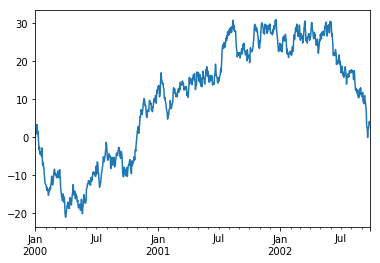

In [296]:
plt.show()

### 1.1.12 데이터 입출력

### Gotchas

## 1.2 전체 API 목록

http://pandas.pydata.org/pandas-docs/stable/api.html

### Input/Output
- [read_json([path_or_buf, orient, typ, dtype, ...])](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html#pandas.read_json) : JSON을 Dataframe으로 변경
- [json_normalize(data[, record_path, meta, ...])](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html#pandas.io.json.json_normalize) : semi-structured JSON을 Dataframe으로 변경
- [read_html(io[, match, flavor, header, ...])](http://pandas.pydata.org/pandasdocs/stable/generated/pandas.read_html.html#pandas.read_html) : 

## 1.4 Usage
### 1.4.1 Object 생성
### 1.4.2 Viewing Data

In [ ]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime

In [111]:
CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-02-01', datetime.datetime.now())
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [112]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [113]:
df.index

DatetimeIndex(['2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06',
               '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10',
               '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16',
               '2017-02-17', '2017-02-20', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
               '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
               '2017-03-17', '2017-03-20', '2017-03-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [114]:
df.ix[0]

Open         1977000.0
High         1983000.0
Low          1952000.0
Close        1956000.0
Volume        283000.0
Adj Close    1956000.0
Name: 2017-02-01 00:00:00, dtype: float64

In [115]:
df.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0


In [116]:
df.tail(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-20,2100000.0,2106000.0,2087000.0,2095000.0,205000,2095000.0
2017-03-21,2089000.0,2134000.0,2088000.0,2128000.0,284400,2128000.0


In [120]:
df['2017-02']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [121]:
df['2016-07-01':'2017-12-31']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [122]:
df['2017-01-01':]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-01,1977000.0,1983000.0,1952000.0,1956000.0,283000,1956000.0
2017-02-02,1980000.0,1983000.0,1960000.0,1968000.0,300500,1968000.0
2017-02-03,1970000.0,1975000.0,1959000.0,1973000.0,207700,1973000.0
2017-02-06,1979000.0,1983000.0,1957000.0,1978000.0,177200,1978000.0
2017-02-07,1978000.0,1979000.0,1938000.0,1941000.0,280800,1941000.0
2017-02-08,1937000.0,1939000.0,1910000.0,1920000.0,341800,1920000.0
2017-02-09,1939000.0,1942000.0,1911000.0,1920000.0,273800,1920000.0
2017-02-10,1920000.0,1938000.0,1915000.0,1918000.0,220400,1918000.0
2017-02-13,1887000.0,1903000.0,1886000.0,1898000.0,222000,1898000.0


In [123]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,3.500000e+01
mean,1.965686e+06,1.987971e+06,1.955257e+06,1.974457e+06,232725.714286,1.974457e+06
std,6.396128e+04,6.656465e+04,6.574520e+04,6.923674e+04,70378.377958,6.923674e+04
min,1.854000e+06,1.898000e+06,1.854000e+06,1.879000e+06,0.000000,1.879000e+06
25%,1.920500e+06,1.938500e+06,1.909000e+06,1.920000e+06,201450.000000,1.920000e+06
50%,1.961000e+06,1.979000e+06,1.951000e+06,1.965000e+06,222000.000000,1.965000e+06
75%,2.000000e+06,2.018500e+06,1.997000e+06,2.010000e+06,281900.000000,2.010000e+06
max,2.100000e+06,2.134000e+06,2.088000e+06,2.128000e+06,424900.000000,2.128000e+06


## 주식 데이터 표현 예제

In [ ]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

df['MA_5'] = df['Adj Close'].rolling(window=5, center=False).mean()
df['MA_20'] = df['Adj Close'].rolling(window=20, center=False).mean()
df['diff'] = df['MA_5'] - df['MA_20']

<bound method FramePlotMethods.line of <pandas.tools.plotting.FramePlotMethods object at 0x0CF71B50>>

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16,8)

#price(가격)
price_chart = plt.subplot2grid((4,1),(0,0),rowspan=2)
price_chart.plot(df.index, df['Adj Close'], label = 'Adj Close')
price_chart.plot(df.index, df['MA_5'], label = 'MA_5')
price_chart.plot(df.index, df['MA_20'], label = 'MA_20')

plt.title("Samsung 2017")
plt.legend(loc='best')

vol_chart = plt.subplot2grid((4,1),(2,0), rowspan = 1)
vol_chart.bar(df.index, df['Volume'], color = 'c')

signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(df.index, df['diff'].fillna(0), color = 'g')
plt.axhline(y=0, linestyle = '--', color = 'k')

prev_key = prev_val = 0
for key, val in df['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        print('GOLD', key, val)
        price_chart.annotate('Golden', xy = (key, df['MA_20'][key]), xytext=(10,-30), 
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
        signal_chart.annotate('BUY', xy = (key, df['diff'][key]), xytext=(10,-30),
                              textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
    elif val * prev_val < 0 and val < prev_val:
        print('DEAD', key, val)
        price_chart.annotate('Dead', xy = (key, df['MA_20'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
        signal_chart.annotate('Sell', xy = (key, df['diff'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val


In [ ]:
plt.show()

In [105]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

In [106]:
df.tail(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-17,2090000.0,2125000.0,2086000.0,2120000.0,252000,2120000.0
2017-03-20,2100000.0,2106000.0,2087000.0,2095000.0,205000,2095000.0
2017-03-21,2089000.0,2134000.0,2088000.0,2128000.0,284400,2128000.0


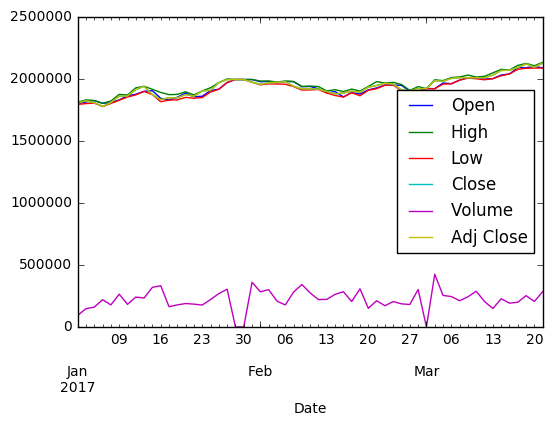

In [109]:
plt.show()

1. Clipboard에 있는것을 pandas형식으로 저장
 - 웹페이지의 단어를 Copy : <a href ="http://www.koreabaseball.com/teamrank/teamrank.aspx"> 야구 순위 </a>

In [ ]:
#df = pd.read_clipboard()

[Object Creation]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series([1,3,5,np.nan, 6,8])

In [ ]:
s

In [ ]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])

In [ ]:
data

In [ ]:
data[:] = [(1,2,'hello'), (2,3,'world')]

In [ ]:
data

In [ ]:
pd.DataFrame(data)

In [ ]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
pd.DataFrame(data2)

In [ ]:
d = {'one' : [1., 2., 3., ],}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df

In [ ]:
e = {'one' : [1., 2., 3., 4. ],}

In [ ]:
e = pd.DataFrame(e)

In [ ]:
e

In [ ]:
df.insert(1, 'bar', e)

In [ ]:
df

In [ ]:
df1 = e

In [ ]:
df1.insert(1, 'bar', e)

In [ ]:
df1

In [ ]:
index = pd.date_range('1/1/2000', periods=8)

In [ ]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

In [ ]:
index

In [ ]:
df

In [ ]:
df.loc['2000-01-01']

In [ ]:
df

In [ ]:
df.sub(df['A'], axis=0)

In [ ]:
df.info()

In [ ]:
df.A

In [ ]:
midx = pd.MultiIndex(levels=[['one', 'two'], ['x','y']], labels=[[1,1,0,0],[1,0,1,0]])


In [ ]:
midx

In [ ]:
df = pd.DataFrame({'A' : [1, 2, 3, 4], 'B': [5, 6, 7, 8]}, index=midx)


In [ ]:
df

In [ ]:
pn = df.to_panel()

In [ ]:
pn